EJEMPLO: Self-Organizing Maps (SOM)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pickle import dump, load
from minisom import MiniSom

In [3]:
X_train = pd.read_csv('../Samples/Clean/Feature_Selection/X_train.csv')
X_test = pd.read_csv('../Samples/Clean/Feature_Selection/X_test.csv')
y_train = pd.read_csv('../Samples/Clean/Feature_Selection/Y_train.csv')
y_test = pd.read_csv('../Samples/Clean/Feature_Selection/Y_test.csv')

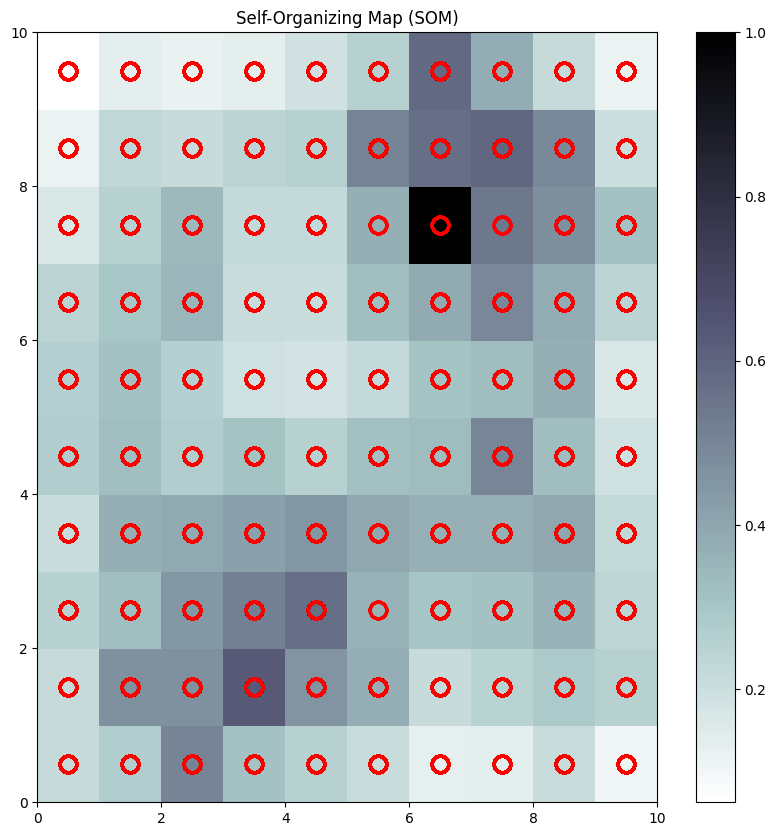

In [4]:

#Convertir el DataFrame completo a un array NumPy
X_train_array = X_train.to_numpy()


#Crear y entrenar el SOM - Definir el tamaño del mapa: ejemplo con un mapa de 10x10
som = MiniSom(x=10, y=10, input_len=X_train_array.shape[1], sigma=1.0, learning_rate=0.5)

# Inicializar los pesos aleatoriamente
som.random_weights_init(X_train_array)

# Entrenar el SOM con 1000 iteraciones
som.train_random(X_train_array, 1000)

#Visualizar los resultados - # Graficar el mapa de distancias
plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # distancia del mapa
plt.colorbar()

# Marcar los puntos de los datos en el mapa
for i, x in enumerate(X_train_array):
    w = som.winner(x)  # obtener el nodo ganador
    plt.plot(w[0] + 0.5, w[1] + 0.5, 'o', markerfacecolor='None', markeredgecolor='r', markersize=12, markeredgewidth=2)

plt.title('Self-Organizing Map (SOM)')
plt.show()


In [5]:
dump(som, open("../Models/som.pkl", "wb"))